# Udacity Capstone

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
import itertools 
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/Users/nujood/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. Load Data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

print(df_train.shape)
print(df_test.shape)

(404290, 6)
(3563475, 3)


In [3]:
df_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [49]:
df_train.head(20)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df_train.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [7]:
# first 5 rows of test data
df_test.head(5)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


## 2. Clean the data and impute missing values

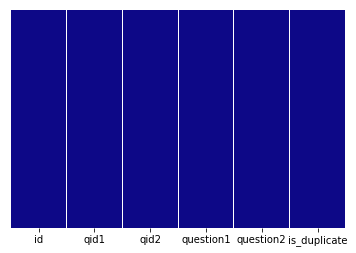

In [8]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='plasma');

In [9]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
# drop all the rows which have NaN values for all the columns
df_train.dropna(inplace=True)

In [11]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

## 3. Data Exploration

Number of training data: 404287
Percentage of duplicate question pairs: 36.920000 %
Total number of questions: 537929
Number of questions appearing multiple times: 111778


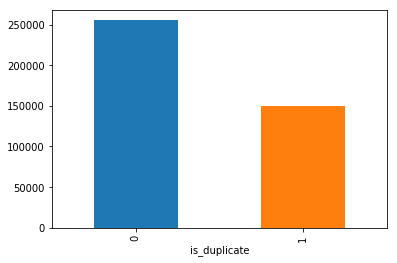

In [48]:
#Look at some statistics of training data
print ("Number of training data: %d" %len(df_train))
print ("Percentage of duplicate question pairs: %f %%" %round(df_train['is_duplicate'].mean()*100,2))
qids = (pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist()))
print ("Total number of questions: %d" %len(np.unique(qids)))
print ("Number of questions appearing multiple times: %d" %np.sum(qids.value_counts()>1))
df_train.groupby("is_duplicate")['id'].count().plot.bar()

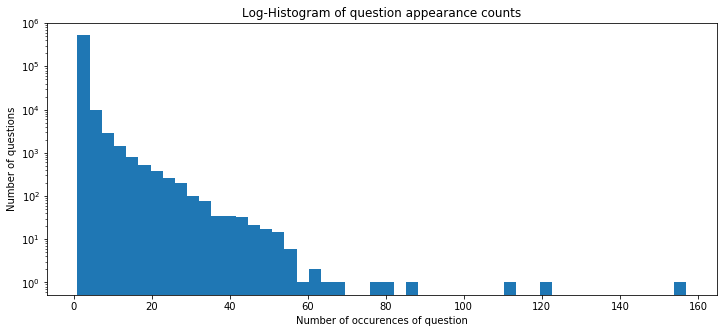

In [13]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [50]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

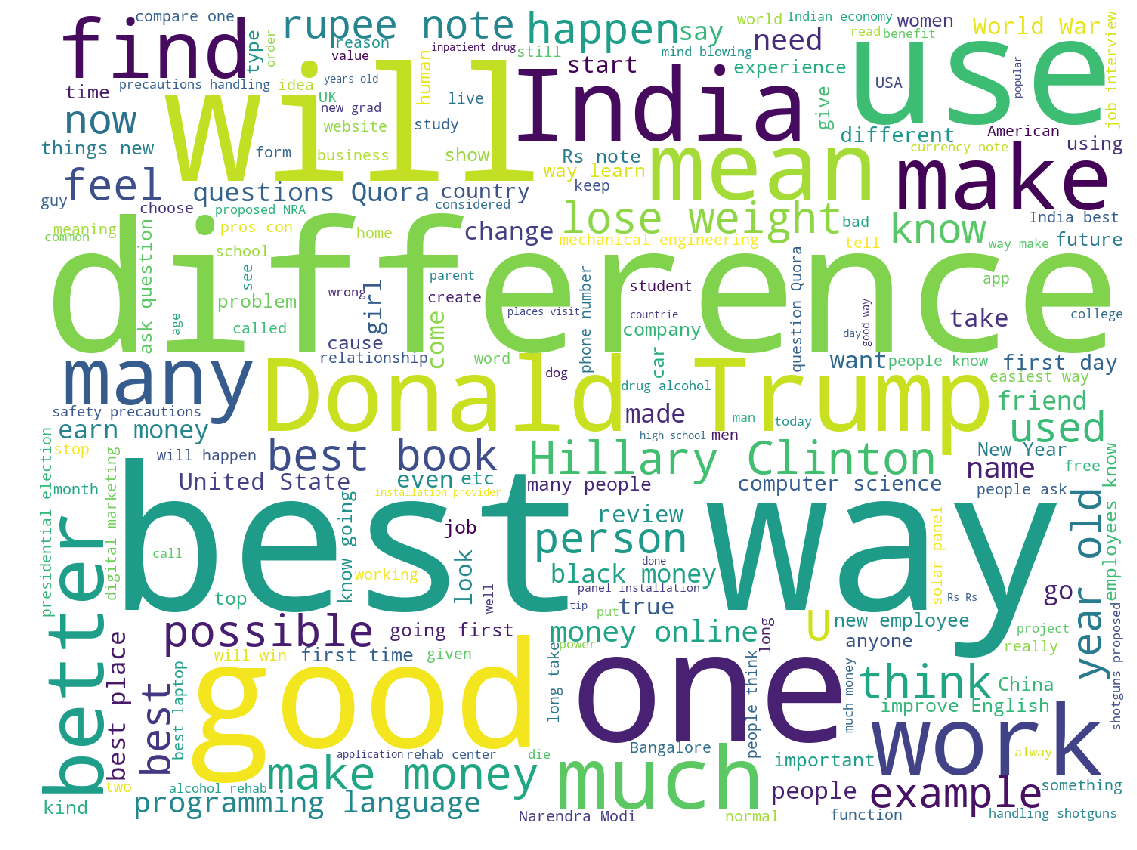

In [16]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [17]:
# Descriptive Statistics
df_train.describe()

,id,qid1,qid2,is_duplicate
count,404287.000000,404287.000000,404287.000000,404287.000000
mean,202144.340337,217243.151093,220955.212082,0.369201
std,116708.673691,157751.614317,159903.168488,0.482589
min,0.000000,1.000000,2.000000,0.000000
25%,101071.500000,74436.500000,74726.500000,0.000000
50%,202145.000000,192181.000000,197053.000000,0.000000
75%,303216.500000,346573.000000,354692.000000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [18]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


## 4. Data Processing


### TF-IDF

I'm now going to try to improve this feature, by using something called TF-IDF (term-frequency-inverse-document-frequency). This means that we weigh the terms by how uncommon they are, meaning that we care more about rare words existing in both questions than common one. This makes sense, as for example we care more about whether the word "exercise" appears in both than the word "and" - as uncommon words will be more indicative of the content.

In [19]:
#Function to calculate normalized word share between two questions
def word_share_norm(x):
    
    if(len(x)==6):
        index1 = 3
        index2 = 4
    else:
        index1 = 1
        index2 = 2    
    
    w1 = set(map(lambda word: word.lower().strip(), str(x[index1]).split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), str(x[index2]).split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [20]:
# Combine all questions into corpus for analysis similar to Term-frequency in TFIDF
train_questions = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_questions = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)
#Implement TFIDF function
def get_weight(count, eps=5000, min_count=2):
    if count < min_count:
        return 0 #remove words only appearing once 
    else:
        R = 1.0 / (count + eps)
        return R

eps = 5000 
words = (" ".join(train_questions)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}
print ("Most common words: ", (sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10]))

Most common words:  [('the', 2.6230677826945727e-06), ('what', 3.1649375557820244e-06), ('is', 3.6516741099957276e-06), ('how', 4.463946932598865e-06), ('i', 4.58330850707892e-06), ('a', 4.646127684881036e-06), ('to', 4.783155639101341e-06), ('in', 5.006909535158519e-06), ('of', 6.100871814582304e-06), ('do', 6.260956674179815e-06)]


In [21]:
#Calculate TFIDF word match share as our new feature
def tfidf_word_share_norm(x):
    
    if(len(x)==6):
        index1 = 3
        index2 = 4
    else:
        index1 = 1
        index2 = 2 
        
    w1 = set(map(lambda word: word.lower().strip(), str(x[index1]).split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), str(x[index2]).split(" "))) 
    if len(w1)==0 or len(w2)==0:
        return 0
    common = w1 & w2
    share_weight = [weights.get(word, 0) for word in common]
    total_weight = [weights.get(word, 0) for word in w1]+[weights.get(word, 0) for word in w2]
    return np.sum(share_weight)/np.sum(total_weight)

In [22]:
#Construct features for training data: character length, number of words, normalized word share 
train_data = pd.DataFrame(dtype='float64')
train_data['q1chrlen'] = df_train['question1'].str.len()
train_data['q2chrlen'] = df_train['question2'].str.len()
train_data['q1_nword'] = df_train['question1'].apply(lambda x: len(str(x).split(" ")))
train_data['q2_nword'] = df_train['question2'].apply(lambda y: len(str(y).split(" ")))
train_data['word_share'] = df_train.apply(word_share_norm, axis=1)
train_data['TFIDF_share'] = df_train.apply(tfidf_word_share_norm, axis=1, raw=True)
train_data.head()

,q1chrlen,q2chrlen,q1_nword,q2_nword,word_share,TFIDF_share
0,66,57,14,12,0.434783,0.400611
1,51,88,8,13,0.200000,0.193056
2,73,59,14,10,0.166667,0.149204
3,50,65,11,9,0.000000,0.000000
4,76,39,13,7,0.100000,0.009949


In [23]:
#Check if there's NaN values in the data. If yes, replace them.
np.sum(np.isnan(train_data))
train_data.loc[:,'q2chrlen'] = np.nan_to_num(train_data.loc[:,'q2chrlen'])
np.sum(np.isnan(train_data))

q1chrlen       0
q2chrlen       0
q1_nword       0
q2_nword       0
word_share     0
TFIDF_share    0
dtype: int64

In [24]:
#Process test data to have the same features as training data
test_data = pd.DataFrame()
test_data['q1chrlen'] = df_test['question1'].str.len()
test_data['q2chrlen'] = df_test['question2'].str.len()
test_data['q1_nword'] = df_test['question1'].apply(lambda x: len(str(x).split(" ")))
test_data['q2_nword'] = df_test['question2'].apply(lambda y: len(str(y).split(" ")))
test_data['word_share'] = df_test.apply(word_share_norm, axis=1)
test_data['TFIDF_share'] = df_test.apply(tfidf_word_share_norm, axis=1, raw=True)
#Replace NaN if any
np.sum(np.isnan(test_data))
test_data.loc[:,['q1chrlen','q2chrlen']] = np.nan_to_num(test_data.loc[:,['q1chrlen','q2chrlen']])
np.sum(np.isnan(test_data))

q1chrlen       0
q2chrlen       0
q1_nword       0
q2_nword       0
word_share     0
TFIDF_share    0
dtype: int64

## 5. Feature Visualization

Text(0,0.5,'Probability')

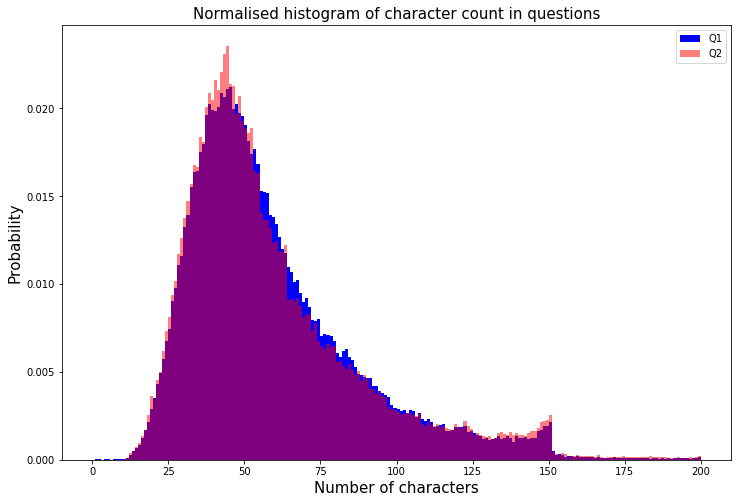

In [25]:
#Get some visual on character count
plt.figure(figsize=(12, 8))
plt.hist(train_data['q1chrlen'], bins=200, range=[0, 200], color='blue', normed=True, label='Q1')
plt.hist(train_data['q2chrlen'], bins=200, range=[0, 200], color='red',alpha = 0.5, normed=True, label='Q2')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

We can see that most questions have anywhere from 15 to 150 characters in them. It seems that the test distribution is a little different from the train one, but not too much so (I can't tell if it is just the larger data reducing noise, but it also seems like the distribution is a lot smoother in the test set).

Text(0,0.5,'Probability')

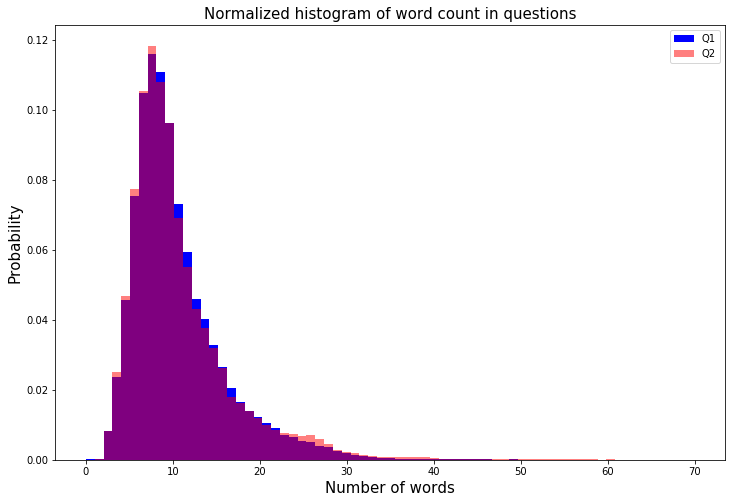

In [26]:
#Get some visual on word count
plt.figure(figsize=(12, 8))
plt.hist(train_data['q1_nword'], bins=np.linspace(0, 70, 70), range=[0, 70], normed = True, color='blue', label='Q1')
plt.hist(train_data['q2_nword'], bins=np.linspace(0, 70, 70), range=[0, 70], normed = True, color='red',alpha = 0.5, label='Q2')
plt.title('Normalized histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

We see a similar distribution for word count, with most questions being about 10 words long. It looks to me like the distribution of the training set seems more "pointy", while on the test set it is wider. Nevertheless, they are quite similar.

Text(0.5,0,'word_share_ratio')

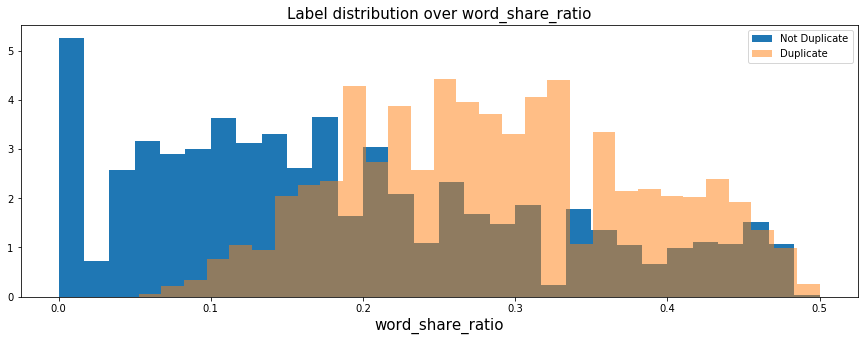

In [27]:
#Get some visual on word share
plt.figure(figsize=(15, 5))
train_word_share = train_data['word_share']
plt.hist(train_word_share[df_train['is_duplicate'] == 0], bins=30, normed=True, label='Not Duplicate')
plt.hist(train_word_share[df_train['is_duplicate'] == 1], bins=30, normed=True, alpha=0.5, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_share_ratio', fontsize=15)
plt.xlabel('word_share_ratio', fontsize=15)

Text(0.5,0,'TFIDF_share')

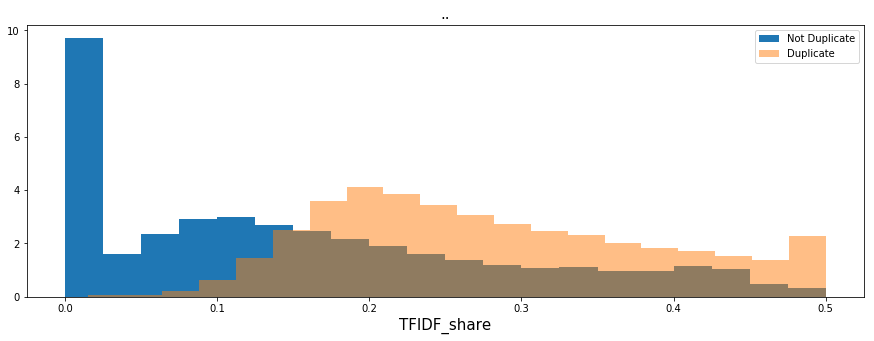

In [28]:
#Get some visual on TFIDF word share
plt.figure(figsize=(15, 5))
train_tfidf = train_data['TFIDF_share'].fillna(0)
plt.hist(train_tfidf[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_tfidf[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.5, label='Duplicate')
plt.legend()
plt.title('..', fontsize=15)
plt.xlabel('TFIDF_share', fontsize=15)

## 6. Benchmark Model
We use Random Forest as my benchmark model here. Later on I'll try to beat the benchmark accuracy.

In [29]:
#Split training data to train and validation data sets
label = df_train['is_duplicate']
X_train, X_valid, y_train, y_valid = train_test_split(train_data, label, test_size=0.2, random_state=10)

In [30]:
#Benchmark model : random forest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction = rfc.predict(X_valid)
pre = rfc.predict(X_valid)
score_rfc = rfc.score(X_valid, y_valid)

acc = accuracy_score(y_valid, pre)
log_loss = log_loss(y_valid, pre)

print("Accuracy: ", acc)
print("Log Loss: ", log_loss)

Accuracy:  0.7194835390437557
Log Loss:  9.68879469370922


## 7. Build The Network

In [37]:
#create model
combinedModel = Sequential()
combinedModel.add(Dense(15, input_dim = X_train.shape[1], activation='elu'))
combinedModel.add(Dense(5, activation='elu'))
combinedModel.add(Dense(1, activation='sigmoid'))

In [39]:
#compile model
combinedModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
#fit the model
trained_model = combinedModel.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid))

Train on 323429 samples, validate on 80858 samples
Epoch 1/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4777 - acc: 0.7227 - val_loss: 0.4825 - val_acc: 0.7174
Epoch 2/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4776 - acc: 0.7223 - val_loss: 0.4761 - val_acc: 0.7260
Epoch 3/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4771 - acc: 0.7232 - val_loss: 0.4766 - val_acc: 0.7221
Epoch 4/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4768 - acc: 0.7237 - val_loss: 0.4761 - val_acc: 0.7250
Epoch 5/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4763 - acc: 0.7244 - val_loss: 0.4819 - val_acc: 0.7178
Epoch 6/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4763 - acc: 0.7243 - val_loss: 0.4810 - val_acc: 0.7170
Epoch 7/20
323429/323429 [==============================] - 5s 15us/step - loss: 0.4762 - acc: 0.7240 - val_loss: 0

## 8. Model Evaluation

In [41]:
#evaluate model
predictions_test = combinedModel.predict(X_valid)

predictions_test = [item for sublist in predictions_test for item in sublist]

predictions_test_bool = [(prediction > 0.5) for prediction in predictions_test]

Confusion matrix, without normalization
[[38120 12887]
 [ 9647 20204]]


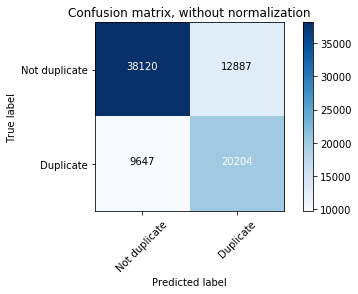

In [54]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = predictions_test_bool

cnf_matrix = confusion_matrix(y_valid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not duplicate','Duplicate'], title='Confusion matrix, without normalization')

The Accuracy is better than the Benchmark, but I will try to make the accuracy better.

# MLPClassifier

In [47]:
#Model Fitting and Predictions
model = MLPClassifier(solver='lbfgs', alpha = 0.10)
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
pred_probs = model.predict_proba(X_valid)
acc_score = accuracy_score(y_valid, predictions)
print(acc_score)

0.6655989512478666


The model got worse than the sequential model.